<h1>Digit Recognizer</h1>

**ID: AI-0007<br>
Submission date: 11-1-2018**
<br><br>

# INTRODUCTION

the MNIST dataset is one of the most popular datasets to start using predictive algorithms for visual datasets. This classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. The goal here is to use neural network to predict the values of the digit images.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import keras
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.convolutional import Convolution2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


At first, like always, let's load the data. Then we'll drop the label column because that's the column that'll be needed to predict the values and if we show this column to the training algorithm, it will memorize it and predict using the label to get 100% accuracy.

In [2]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 


In [4]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


from above, we can see, data is not normalized. So let's normalize the data at first. and then check if it's normalized.

In [5]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


We will be using CNN for our prediction. CNN prefers images than text data.So, we'll reshape the data into images of 3 dimensions (height = 28px, width = 28px , canal = 1)<br>
**we use -1 when we dont know the exact dimention of data.**

In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [7]:
Y_train[0]

1

as my output have 10 classes, so will be encode labels to one hot vectors

In [8]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [9]:
Y_train[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Split the train and the validation set for the fitting

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

lets see Some examples digits

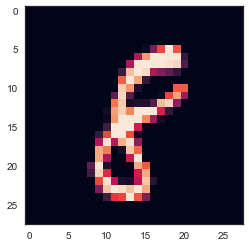

In [11]:
g = plt.imshow(X_train[0][:,:,0])

now create the main CNN model. as there is no formal rule how many convolutional,pooling or dense layer should use, i tried sevelal configuration, find a decent result with this model.
<br> model is 
<pre>convolutional -> convolutional -> pooling -> Dropout -> 
convolutional -> convolutional -> pooling -> Dropout ->
Flatten -> Dense - > Dropout </pre>

In [12]:
model = Sequential()

#convolutional (Conv2D) layer. It is like a set of learnable filters.
#'relu' is the rectifier (activation function max(0,x).
#The rectifier activation function is used to add non linearity to the network.
convolution_layer_1_1 = Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1))
model.add(convolution_layer_1_1)

convolution_layer_1_2 = Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu')
model.add(convolution_layer_1_2)

#pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter.
#It looks at the 2 neighboring pixels and picks the maximal value.
#These are used to reduce computational cost, and to some extent also reduce overfitting. 
model.add(MaxPool2D(pool_size=(2,2)))

#Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored
#for each training sample.
model.add(Dropout(0.25))

convolution_layer_2_1 = Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu')
model.add(convolution_layer_2_1)

convolution_layer_2_2 = Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu')
model.add(convolution_layer_2_2)

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax", name='preds'))

Define the optimizer for my model.as i use ADAM, but RMSprop performs better than that.

In [13]:
optimizer_function = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

Compile the model

In [14]:
model.compile(optimizer = optimizer_function , loss = "categorical_crossentropy", metrics=["accuracy"])

small learning rate can find a more optimized ans.so i define a Set a learning rate annealer.basically its function is to monitor the accuracy.if 3 successive accuracy are same, then this function reduce the learning rate for a better result.

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [16]:
epochs = 30
batch_size = 86

although Dropout prevent model from overfitting, but as some extra precaution i use data augmentation to prevent overfitting

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

Now, before finally predicting, let's look at the model of the CNN

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [19]:
datagen.fit(X_train)

In [20]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 13s - loss: 0.4263 - acc: 0.8619 - val_loss: 0.0558 - val_acc: 0.9824
Epoch 2/30
 - 11s - loss: 0.1391 - acc: 0.9586 - val_loss: 0.0404 - val_acc: 0.9883
Epoch 3/30
 - 11s - loss: 0.1025 - acc: 0.9694 - val_loss: 0.0409 - val_acc: 0.9881
Epoch 4/30
 - 11s - loss: 0.0873 - acc: 0.9735 - val_loss: 0.0380 - val_acc: 0.9895
Epoch 5/30
 - 11s - loss: 0.0776 - acc: 0.9777 - val_loss: 0.0285 - val_acc: 0.9907
Epoch 6/30
 - 11s - loss: 0.0729 - acc: 0.9783 - val_loss: 0.0304 - val_acc: 0.9895
Epoch 7/30
 - 11s - loss: 0.0688 - acc: 0.9802 - val_loss: 0.0379 - val_acc: 0.9890
Epoch 8/30
 - 11s - loss: 0.0727 - acc: 0.9797 - val_loss: 0.0271 - val_acc: 0.9907
Epoch 9/30
 - 11s - loss: 0.0660 - acc: 0.9811 - val_loss: 0.0291 - val_acc: 0.9910
Epoch 10/30
 - 11s - loss: 0.0661 - acc: 0.9814 - val_loss: 0.0251 - val_acc: 0.9924
Epoch 11/30
 - 11s - loss: 0.0687 - acc: 0.9807 - val_loss: 0.0266 - val_acc: 0.9912
Epoch 12/30
 - 11s - loss: 0.0657 - acc: 0.9807 - val_loss: 0.0299 - val_a

now lets visualize, which convolution layer lears what type of shape or edge.

In [21]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

In [23]:
# choose any image to want by specifying the index
img_to_visualize = X_train[65]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

first convolution layer
Shape of conv: (28, 28, 32)
second convolution layer
Shape of conv: (28, 28, 32)
third convolution layer
Shape of conv: (14, 14, 64)
fourth convolution layer
Shape of conv: (14, 14, 64)


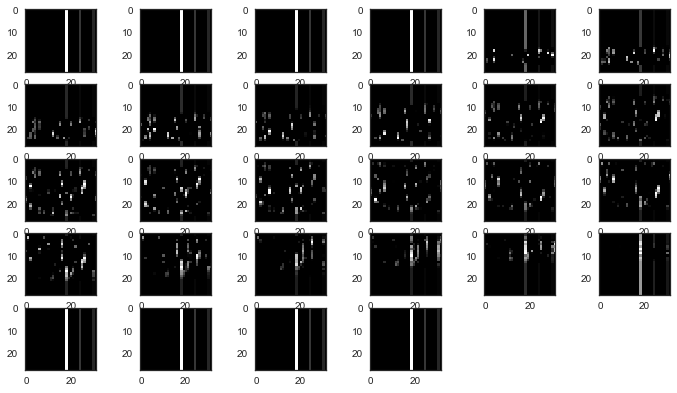

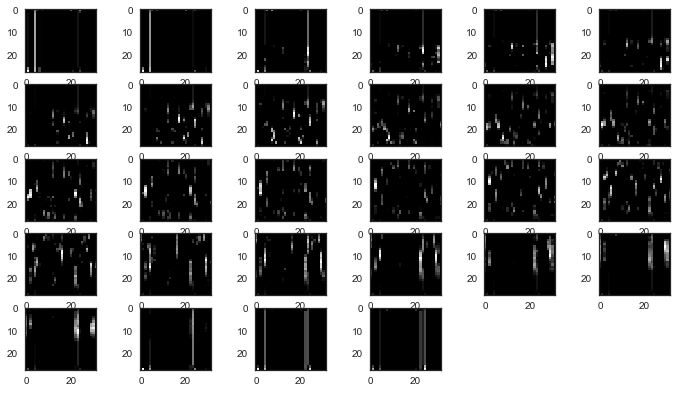

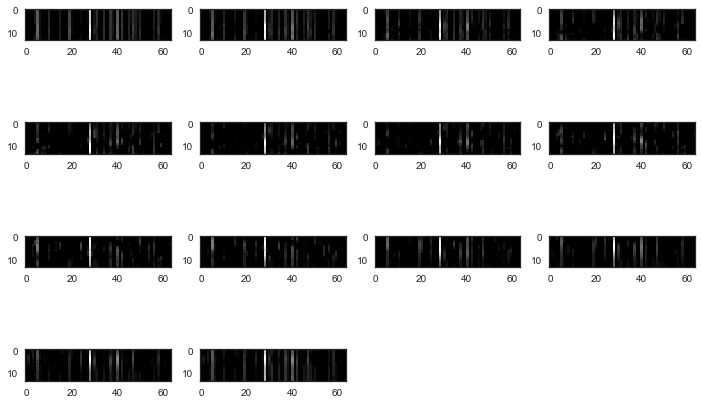

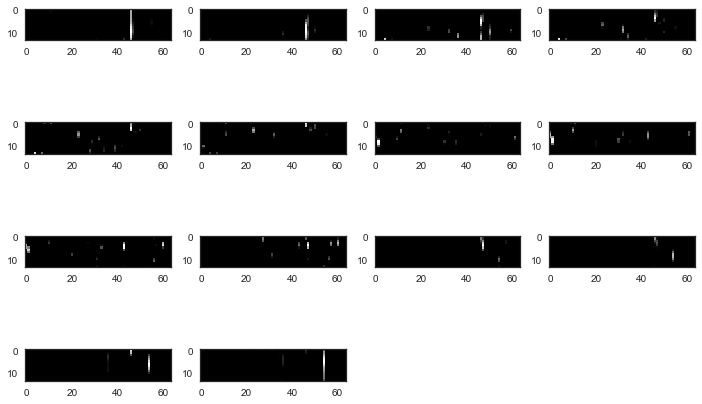

In [24]:
# Specify the layer to want to visualize
print("first convolution layer")
layer_to_visualize(convolution_layer_1_1)
print("second convolution layer")
layer_to_visualize(convolution_layer_1_2)

# As convolution_layer_2_1 is the result of a MaxPool2D layer
# We can see that the image has blurred since
# the resolution has reduced
print('third convolution layer')
layer_to_visualize(convolution_layer_2_1)
print("fourth convolution layer")
layer_to_visualize(convolution_layer_2_2)

lets visualize the accuracy after each epochs.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


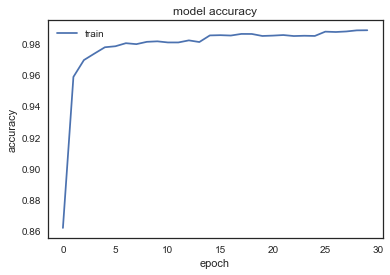

In [25]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

lets visualize the loss after each epochs.

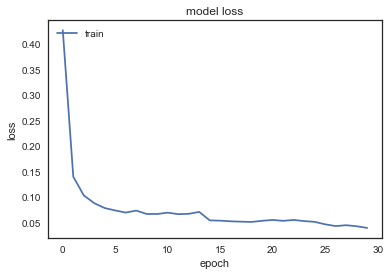

In [26]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

lets plot confusion_matrix to see, how well our model is doing in vaidation set.

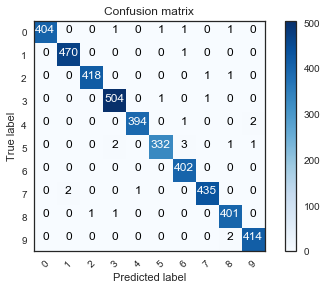

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

From the confusion matrix above we can see that the algorithm successfully predicted almost all of the values except a few.

Now, let's get the submission file for kaggle and check the accuracy there.

In [28]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [29]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("result.csv",index=False)

The score at kaggle for this model is **0.99571**

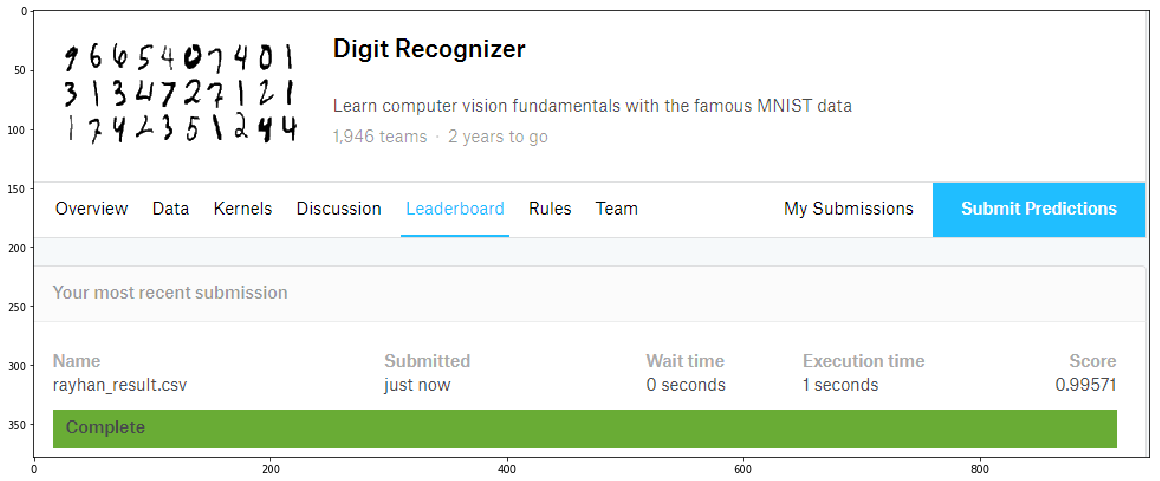

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.gcf()
fig.set_size_inches(20, 10)
img=mpimg.imread('kaggle score.png')
imgplot = plt.imshow(img)
plt.show()

# CONCLUSION

The idea of this project was to get introduced to CNN and how it can be implemented. With even more fine-tuning of the data 100% accuracy can be achieved.